In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_load = pd.read_csv('bank_stocks_historical_data.csv')

In [3]:
print(data_load.columns)

print(data_load.dtypes)

print(data_load['Ticker'].unique())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object
['HDFCBANK.NS' 'ICICIBANK.NS' 'KOTAKBANK.NS' 'SBIN.NS' 'AXISBANK.NS']


In [4]:

line_break ="================================================================================================================="
colors = ['lightcoral', 'lightblue', 'lightgreen', 'peachpuff', 'lavender', 'mintcream', 'palegoldenrod', 'thistle', 'lightyellow', 'skyblue', 'lightpink', 'honeydew', 'lavenderblush']


In [5]:
stockname = 'HDFCBANK.NS'

In [6]:

data_load['Date'] = pd.to_datetime(data_load['Date']).dt.strftime('%Y-%m-%d')


# General Exploration

### 
1. How many rows and columns are in the dataset?


In [9]:
data_load.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Ticker'],
      dtype='object')

### 2. What are the first five entries in the dataset?


In [11]:
data_load.head(1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2019-10-03,1190.325465,1194.021477,1167.669993,1174.581909,8149438,0.0,0.0,HDFCBANK.NS


### 4. How many unique tickers are present?


In [13]:
data_load['Ticker'].unique()

array(['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS',
       'AXISBANK.NS'], dtype=object)

### 5. How many missing values exist in each column?


In [15]:
data_load.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64

# Time Series Analysis

### 6. What is the date range in the dataset?


In [18]:
min_date = data_load['Date'].min()
max_date =  data_load['Date'].max()

print(f'Start data ==> {max_date}   End Date ==> {max_date}')

Start data ==> 2024-10-01   End Date ==> 2024-10-01


### 7. How does the closing price change over time for each ticker?

In [20]:
df_7 = data_load
print(df_7['Date'].dtypes)
print(line_break)
df_7['Date'] = pd.to_datetime(df_7['Date'] )
print(df_7['Date'].dtypes)
print(line_break)

object
datetime64[ns]


In [21]:
df_7.set_index('Date', inplace=True)

In [22]:
df_7 = df_7.groupby('Ticker').resample('YE').last()

In [23]:
df_7 = df_7[['Close']]
df_7.reset_index(inplace=True)

C:\Users\kakan\AppData\Local\Temp\ipykernel_27364\2795497822.py:4: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.barplot(data =df_7,hue='Ticker',x= 'Date', y = 'Close', palette=colors, edgecolor= 'black')


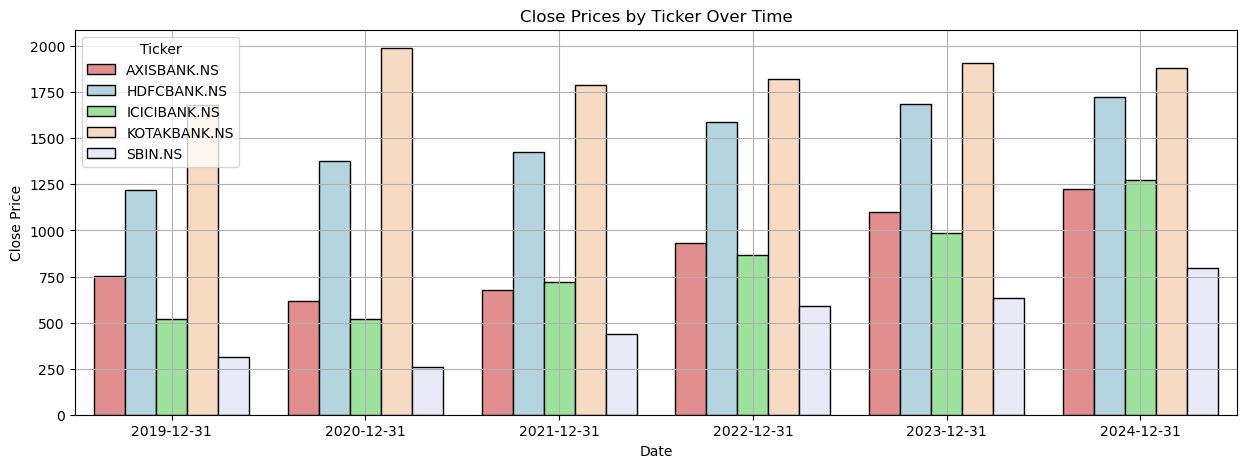

In [24]:

df_7

plt.figure(figsize=(15,5))
sns.barplot(data =df_7,hue='Ticker',x= 'Date', y = 'Close', palette=colors, edgecolor= 'black') 
plt.grid()

plt.title('Close Prices by Ticker Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

### 8. What are the top 5 dates with the highest closing prices?

In [26]:
df_8 = data_load

for i  in df_8['Ticker'].unique():
    
    temp =  df_8[df_8['Ticker'] == i]
    print(i)
    k =temp[['High','Ticker']].sort_values(by='High', ascending = False).head(5)
    print(k)
    print(line_break)
    

HDFCBANK.NS
                   High       Ticker
Date                                
2024-07-03  1794.000000  HDFCBANK.NS
2024-09-26  1788.000000  HDFCBANK.NS
2024-09-25  1788.000000  HDFCBANK.NS
2024-09-24  1781.650024  HDFCBANK.NS
2024-09-27  1778.199951  HDFCBANK.NS
ICICIBANK.NS
                   High        Ticker
Date                                 
2024-09-20  1362.349976  ICICIBANK.NS
2024-09-26  1333.349976  ICICIBANK.NS
2024-09-27  1333.000000  ICICIBANK.NS
2024-09-23  1331.800049  ICICIBANK.NS
2024-09-24  1331.400024  ICICIBANK.NS
KOTAKBANK.NS
                   High        Ticker
Date                                 
2021-10-27  2247.328709  KOTAKBANK.NS
2021-10-26  2234.361445  KOTAKBANK.NS
2021-10-22  2196.107937  KOTAKBANK.NS
2021-10-28  2184.487710  KOTAKBANK.NS
2021-10-25  2177.455244  KOTAKBANK.NS
SBIN.NS
                  High   Ticker
Date                           
2024-06-03  912.000000  SBIN.NS
2024-07-19  899.000000  SBIN.NS
2024-06-04  897.000000  SBIN.NS
202

### 9. How does the trading volume vary over time?


In [28]:
df_9 = data_load
df_9['Year'] = 0
df_9.reset_index(inplace=True)
df_9['Year']=df_9['Date'].dt.year
df_9.set_index('Date',inplace=True)


In [29]:
from datetime import datetime
# Get the current year
current_year = datetime.now().year
# Display the current year
print(current_year)

2024


In [30]:
df_9= df_9[df_9['Year'] == current_year]
df_9= df_9[df_9['Ticker'] == stockname]
df_9 = df_9.resample('ME').last()
df_9['Volume_change_month_to_month'] = 0
df_9.reset_index(inplace=True)

In [31]:
start = df_9.index.min()
end = df_9.index.max()
for i in df_9.index:
    if start < i < end:
        #print(i)
        k = df_9.loc[i]['Volume'] - df_9.loc[i-1]['Volume']
        df_9.loc[i,'Volume_change_month_to_month'] = k
        #print(line_break)

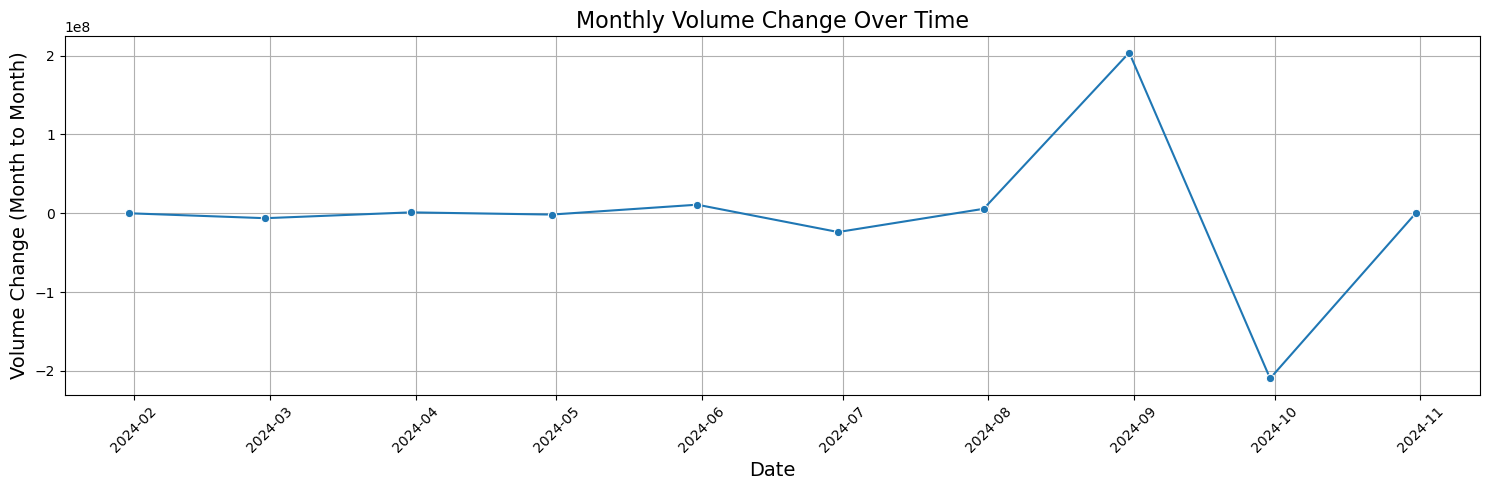

In [32]:
df_9 = df_9[['Date','Volume_change_month_to_month']]

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_9, x='Date', y='Volume_change_month_to_month', marker = 'o')


plt.title('Monthly Volume Change Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume Change (Month to Month)', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

### 11. What is the mean closing price for each ticker?
### 12. What is the median trading volume for each ticker?
### 13. What is the standard deviation of the closing prices for each ticker?
### 14. What are the minimum and maximum closing prices for each ticker?
### 15. What are the average daily returns for each ticker?



In [34]:
df_11 = data_load
df_11 = data_load
df_11['Year'] = 0
df_11.reset_index(inplace=True)
df_11['Year']=df_11['Date'].dt.year
df_11.set_index('Date',inplace=True)


In [35]:
df_11 =df_11[df_11['Year'] == current_year]


In [36]:
df_11 =df_11.groupby('Ticker').resample('ME').last()


AXISBANK.NS
count      10.000000
mean     1157.831885
std        74.308942
min      1046.392334
25%      1096.016602
50%      1165.550476
75%      1213.800018
max      1264.274292
Name: Close, dtype: float64
AXISBANK.NS


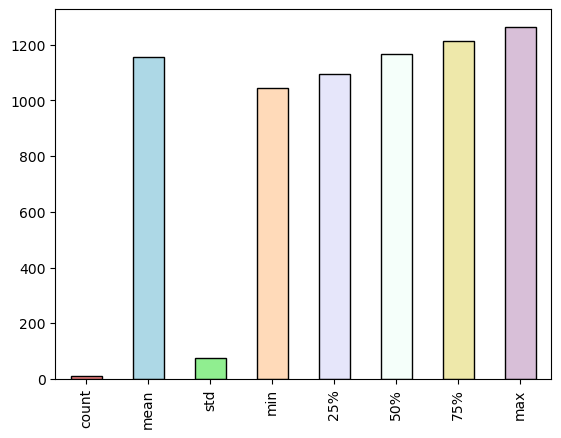

HDFCBANK.NS
count      10.000000
mean     1568.160815
std       127.892195
min      1384.494141
25%      1457.040955
50%      1573.650024
75%      1672.075043
max      1732.050049
Name: Close, dtype: float64
HDFCBANK.NS


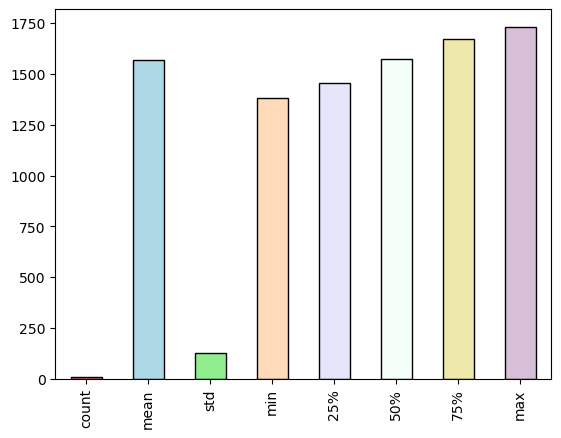

ICICIBANK.NS
count      10.000000
mean     1156.911591
std        91.481579
min      1019.374451
25%      1090.846680
50%      1164.970947
75%      1223.032593
max      1274.400024
Name: Close, dtype: float64
ICICIBANK.NS


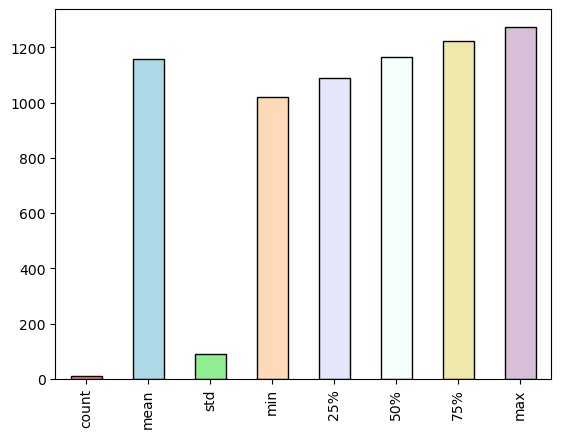

KOTAKBANK.NS
count      10.000000
mean     1771.770618
std        82.659134
min      1622.171997
25%      1710.900269
50%      1792.035889
75%      1819.413788
max      1879.400024
Name: Close, dtype: float64
KOTAKBANK.NS


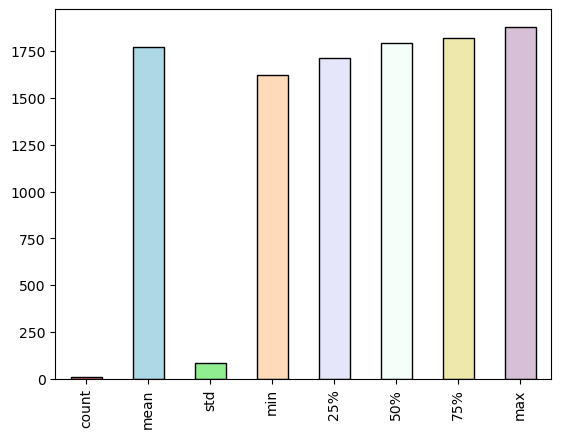

SBIN.NS
count     10.000000
mean     787.041168
std       69.994770
min      629.936157
25%      751.931061
50%      804.786316
75%      826.662476
max      872.400024
Name: Close, dtype: float64
SBIN.NS


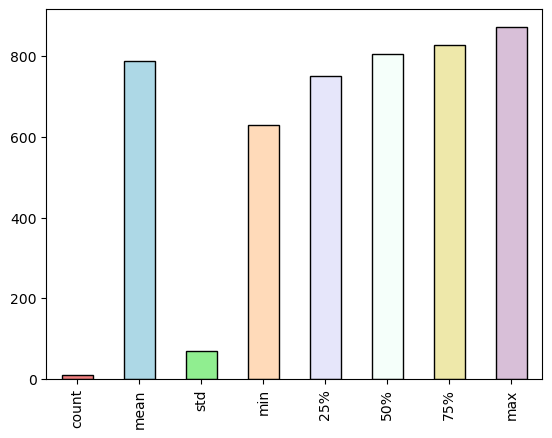

In [37]:
for i in df_11['Ticker'].unique():
    print (i)
    temp = df_11[df_11['Ticker']==i]
    print(temp['Close'].describe())
    print(line_break)
    print(i)
    temp['Close'].describe().plot(kind='bar', color=colors, edgecolor = 'black')
    plt.show()


# Visualizations


### 16. Can you plot the closing price over time for each ticker?

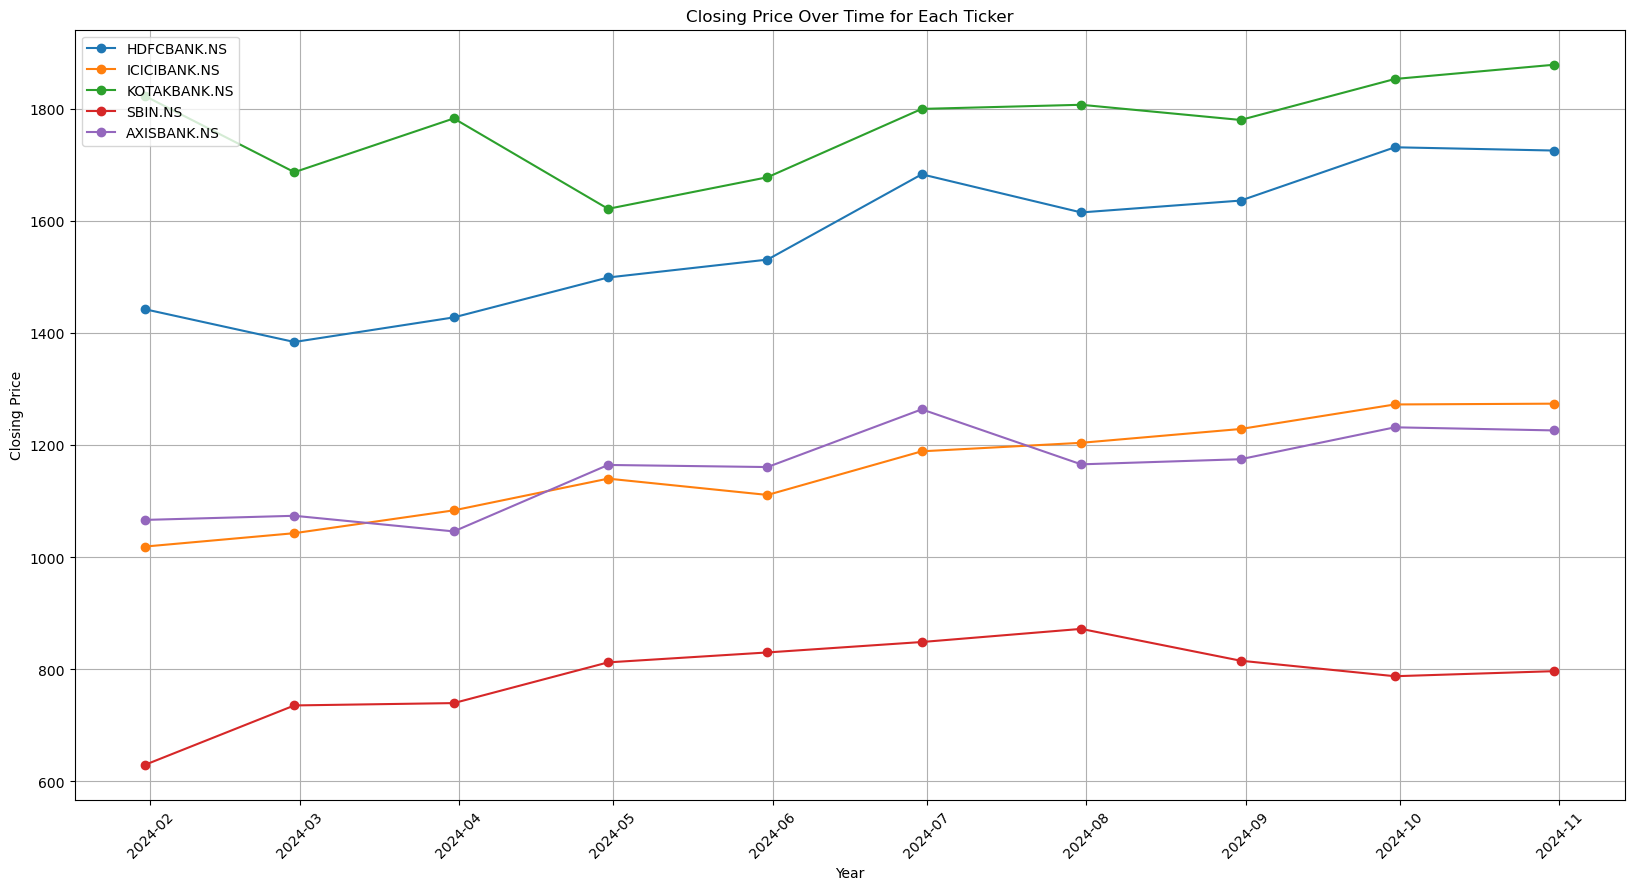

In [40]:
df_11 =data_load
df_11['Ticker'].unique()
df_11=  df_11[df_11['Year'] == current_year]

plt.figure(figsize=(20, 10)) 
for ticker in df_11['Ticker'].unique():
    temp = df_11[df_11['Ticker'] == ticker]  
    temp = temp.resample('ME').last()  
    plt.plot(temp.index, temp['Close'], marker='o', label=ticker)

plt.grid()
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time for Each Ticker')
plt.xticks(rotation=45)  
plt.legend(loc='upper left')
plt.show()

### 17. How does the trading volume distribute across different tickers?

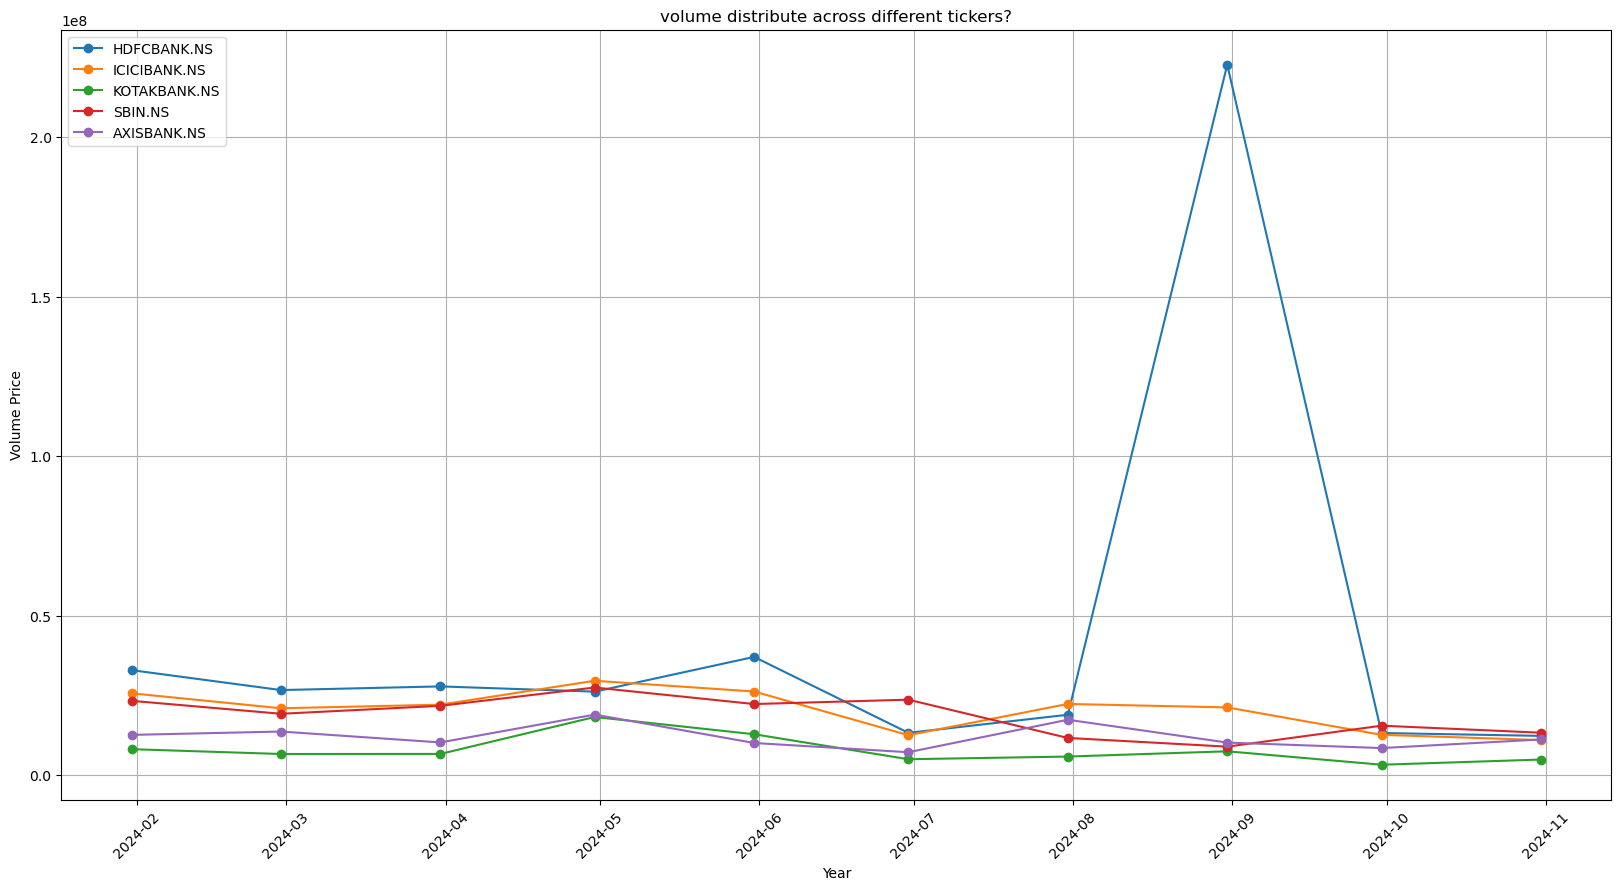

In [42]:
df_17 = data_load
df_17[df_17['Year'] == current_year]

df_11 =data_load
df_17['Ticker'].unique()
df_17=  df_17[df_17['Year'] == current_year]

plt.figure(figsize=(20, 10)) 
for ticker in df_17['Ticker'].unique():
    temp = df_17[df_17['Ticker'] == ticker]  
    #temp.set_index('Date', inplace=True) 
    temp = temp.resample('ME').last()      
    plt.plot(temp.index, temp['Volume'], marker='o', label=ticker)
    
plt.grid()
plt.xlabel('Year')
plt.ylabel('Volume Price')
plt.title('volume distribute across different tickers?')
plt.xticks(rotation=45)  
plt.legend(loc='upper left')
print(line_break)

### 18. Can you create a boxplot for the closing prices of each ticker?

In [44]:
# df_11 contains same data 
df_11 = df_11[['Close','Ticker']]

In [45]:
df_11.reset_index(inplace=True)

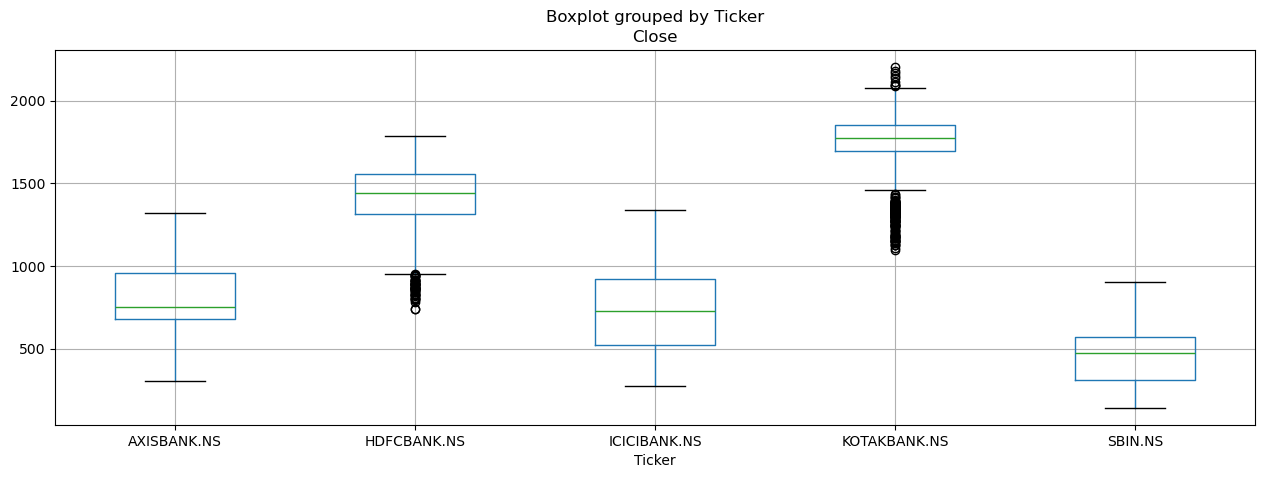

In [46]:
df_11.boxplot(column='Close', by='Ticker', figsize=(15,5))
plt.show()

### 19. What does a histogram of daily returns look like for each stock?

In [48]:
df_19 = data_load
df_19['Ticker'].unique()
df_19['Returns'] = 0.0
df_19.reset_index(inplace=True)
df_19=df_19[df_19['Year'] == current_year]

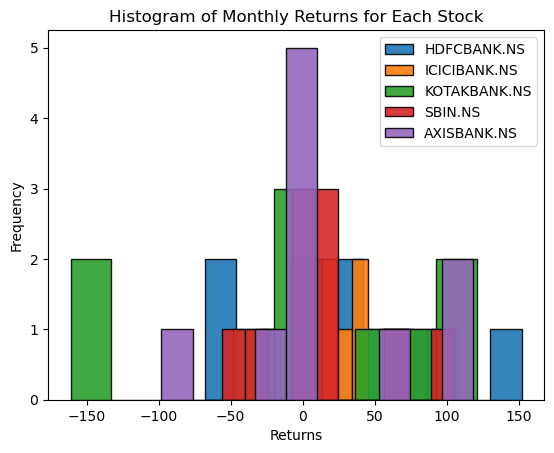

In [49]:
df_19.index
start = df_19.index.min()
end = df_19.index.max()
for stockname in df_19['Ticker'].unique():
   # print(stockname)
    temp = df_19[df_19['Ticker'] == stockname]
   # print(temp)
 #   print(line_break)
    temp.set_index('Date', inplace=True)
    temp= temp.resample('ME').last('Close')
    temp.reset_index(inplace=True)
    start = temp.index.min()
    end = temp.index.max()
    #print('end')
    for i in  temp.index:
        #print(stockname)
        if start<i< end:
            k =temp.loc[i]['Close'] - temp.loc[i-1]['Close'] 
            #print(k)
            temp.loc[i,'Returns']=int(k)
           # print(temp)
            temp[temp['Returns']!=0]


    plt.hist(temp['Returns'], bins=10, alpha=0.9,edgecolor = 'black', label=stockname)

plt.title('Histogram of Monthly Returns for Each Stock')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 21. Which ticker has the highest average closing price?


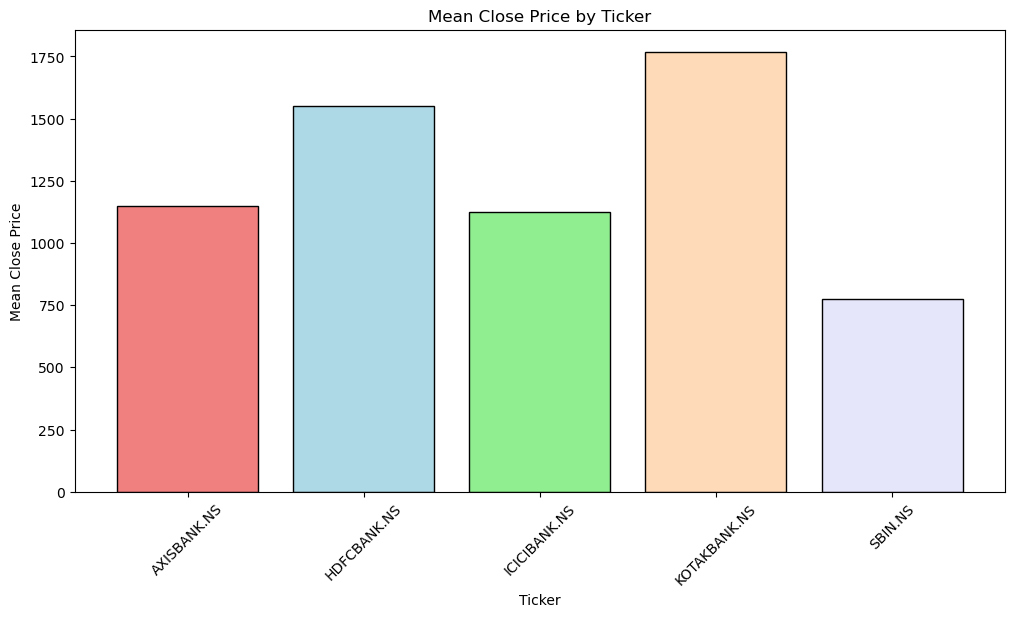

In [51]:
df_21 = data_load
df_21=df_21[df_21['Year'] == current_year]
df_21 = df_21.groupby(by='Ticker').mean('Close')
df_21.reset_index(inplace=True)
df_21
plt.figure(figsize=(12, 6))
plt.bar(df_21['Ticker'], df_21['Close'], color=colors,edgecolor='black')
plt.title('Mean Close Price by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Mean Close Price')
plt.xticks(rotation=45)
plt.show()

### 22. Which ticker shows the highest trading volume?

In [53]:
df_22 = data_load
df_22=df_22[df_22['Year'] == current_year]
temp = df_22.sort_values(by='Volume', ascending=False).head(5)[['Ticker','Volume','Date']]
print(temp.columns)

Index(['Ticker', 'Volume', 'Date'], dtype='object')


HDFCBANK.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
AXISBANK.NS


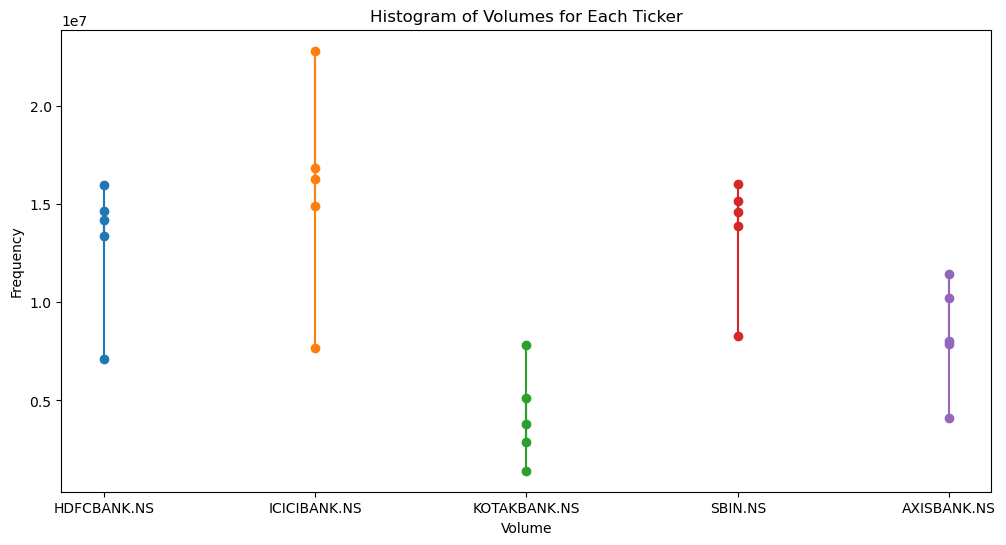

In [54]:
df_22 = data_load

plt.figure(figsize=(12, 6))

for s_name in df_22['Ticker'].unique():
    print(s_name)
    temp = df_22[(df_22['Ticker'] == s_name) & (df_22['Year'] == current_year)]
    temp = temp.head(5)
    plt.plot(temp['Ticker'] ,temp['Volume'],marker='o')


plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Volumes for Each Ticker')


plt.show()


### 23. What is the percentage change in closing price for each ticker over the entire period?

In [56]:
df_23 = data_load
df_23.set_index('Date', inplace=True)

In [57]:
df_23 = df_23.groupby('Ticker').resample('YE').last()
df_23['Returns'] = float(0)

In [58]:
df_23 = df_23[['Close','Returns']]
df_23.reset_index(inplace=True)

AXISBANK.NS
HDFCBANK.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS


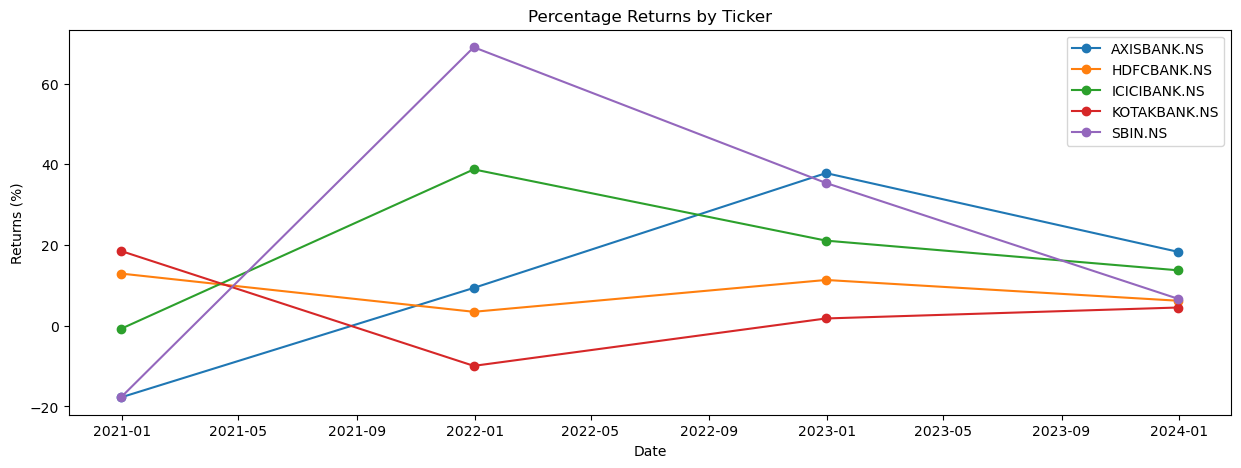

In [59]:
df_23['Ticker'].unique()

plt.figure(figsize=(15,5))
for s_name in df_23['Ticker'].unique():
    print(s_name)
    temp = df_23[df_23['Ticker'] == s_name]
    start = temp.index.min()
    end = temp.index.max()
    for i in temp.index:
        if start < i <end:
            value = temp.loc[i]['Close'] - temp.loc[i-1]['Close']
            value = (value/(temp.loc[i-1]['Close'])) * 100
            temp.loc[i , 'Returns' ] = (value)
    #print(temp)
    #print(line_break)
    temp = temp[temp['Returns']!= 0]
   # print(temp)
    temp

    plt.plot(temp['Date'], temp['Returns'], marker='o', label=s_name)

plt.title('Percentage Returns by Ticker')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.show()

### 24. How do the average closing prices compare among the tickers?

HDFCBANK.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS
AXISBANK.NS


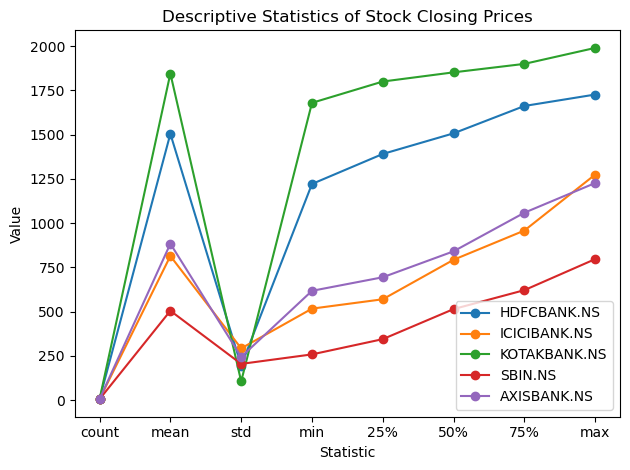

In [61]:
df24 = data_load

for stock_name in df24['Ticker'].unique():
    print(stock_name)
    test = df24.groupby('Ticker').resample('YE').last()
    desc = test[test['Ticker'] == stock_name]['Close'].describe()
    
    plt.plot(desc,marker = 'o',label=stock_name )
plt.legend()
plt.title('Descriptive Statistics of Stock Closing Prices')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


### 25. Which stock has the most volatility based on daily returns?
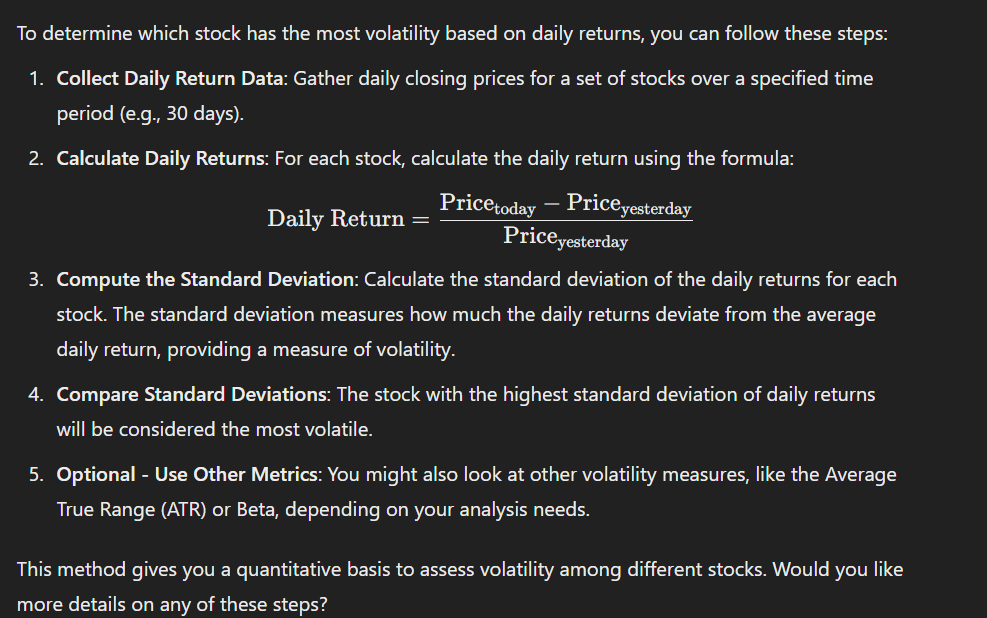

In [63]:
df_25 = data_load
df_25 = df_25.groupby('Ticker').resample('ME').last()
df_25= df_25[df_25['Year'] == current_year]
df_25 = df_25[['Close', 'Returns']]
df_25.reset_index(inplace = True)


AXISBANK.NS
HDFCBANK.NS
ICICIBANK.NS
KOTAKBANK.NS
SBIN.NS


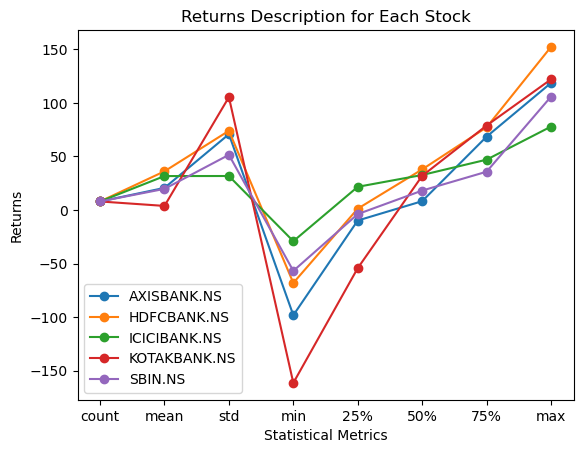

In [64]:
df_25['Ticker'].unique()

for stock_name in df_25['Ticker'].unique():
    print(stock_name)    
    test=df_25[df_25['Ticker'] == stock_name] 
    start = test.index.min()
    end = test.index.max()    
    for i in test.index:
        if start<i<end:
            test.loc[i , 'Returns'] = (test.loc[i]['Close'] - test.loc[i-1]['Close'])
    test=test[test['Returns'] != 0]
    desc = test['Returns'].describe()
    plt.plot(desc.index,desc.values, label=stock_name, marker = 'o' )

plt.xlabel('Statistical Metrics')
plt.ylabel('Returns')
plt.title('Returns Description for Each Stock')
plt.legend()
plt.show()
            

In [65]:
data_load.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker', 'Year', 'Returns'],
      dtype='object')

In [66]:
data_load.index

DatetimeIndex(['2019-10-03', '2019-10-04', '2019-10-07', '2019-10-09',
               '2019-10-10', '2019-10-11', '2019-10-14', '2019-10-15',
               '2019-10-16', '2019-10-17',
               ...
               '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-23',
               '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27',
               '2024-09-30', '2024-10-01'],
              dtype='datetime64[ns]', name='Date', length=6185, freq=None)

In [67]:
data_load['Ticker'].unique()

array(['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS',
       'AXISBANK.NS'], dtype=object)

In [68]:
#pip install tensorflow


In [69]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Load your data
# Example: data_load = pd.read_csv('your_file.csv', index_col='Date', parse_dates=True)

# Preprocess the data
data_load['Close'] = data_load['Close'].astype(float)

# Get unique tickers
tickers = data_load['Ticker'].unique()
predictions = {}

# Define function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Iterate over each ticker
for ticker in tickers:
    print(f"Processing {ticker}...")

    # Filter data for the current ticker
    ticker_data = data_load[data_load['Ticker'] == ticker][['Close']].values

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(ticker_data)

    # Create dataset for LSTM
    time_step = 60  # Number of previous days to consider
    X, y = create_dataset(scaled_data, time_step)

    # Split the dataset into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, shuffle=False)

    # Reshape X to be [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(LSTM(100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(100))
    model.add(Dropout(0.3))
    model.add(Dense(25))
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Implement early stopping and model checkpointing
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f'{ticker}_best_model.keras', monitor='val_loss', save_best_only=True)

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), 
              callbacks=[early_stopping, checkpoint])

    # Prepare data for today's prediction
    last_60_days = scaled_data[-time_step:].reshape(1, time_step, 1)
    predicted_price = model.predict(last_60_days)
    predicted_price = scaler.inverse_transform(predicted_price)  # Rescale to original

    # Store the predicted price with the ticker name
    predictions[ticker] = predicted_price[0][0]

# Print all predictions
for ticker, price in predictions.items():
    print(f"Predicted Stock Price for {ticker} Today: {price:.2f}")


Processing HDFCBANK.NS...


C:\Users\kakan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 493ms/step - loss: 0.0391 - val_loss: 0.0133
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - loss: 0.0120 - val_loss: 0.1104
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - loss: 0.0118 - val_loss: 0.0077
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - loss: 0.0099 - val_loss: 0.0436
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - loss: 0.0083 - val_loss: 0.0578
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - loss: 0.0073 - val_loss: 0.0116
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - loss: 0.0094 - val_loss: 0.0156
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - loss: 0.0059 - val_loss: 0.0243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Processing ICICIBANK.NS...
Epoch 1/50


C:\Users\kakan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 645ms/step - loss: 0.0109 - val_loss: 0.0365
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - loss: 0.0037 - val_loss: 0.0540
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step - loss: 0.0032 - val_loss: 0.0081
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - loss: 0.0025 - val_loss: 0.0244
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - loss: 0.0021 - val_loss: 0.0075
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - loss: 0.0017 - val_loss: 0.0090
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step - loss: 0.0013 - val_loss: 0.0119
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - loss: 0.0016 - val_loss: 0.0067
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - loss: 0.0014 - val_loss: 0.0060
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 0.0014 - val_loss: 0.0092


C:\Users\kakan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 469ms/step - loss: 0.0647 - val_loss: 0.0069
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.0194 - val_loss: 0.0945
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - loss: 0.0244 - val_loss: 0.0187
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - loss: 0.0161 - val_loss: 0.0086
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - loss: 0.0153 - val_loss: 0.0434
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - loss: 0.0146 - val_loss: 0.0294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
Processing SBIN.NS...
Epoch 1/50


C:\Users\kakan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 476ms/step - loss: 0.0093 - val_loss: 0.0450
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - loss: 0.0030 - val_loss: 0.0491
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - loss: 0.0020 - val_loss: 0.0059
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - loss: 0.0016 - val_loss: 0.0170
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - loss: 9.8890e-04 - val_loss: 0.0060
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - loss: 8.8730e-04 - val_loss: 0.0045
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - loss: 9.5061e-04 - val_loss: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Processing AXISBANK.NS...
Epoch 1/50


C:\Users\kakan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 486ms/step - loss: 0.0466 - val_loss: 0.0234
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - loss: 0.0087 - val_loss: 0.0322
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - loss: 0.0096 - val_loss: 0.0059
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - loss: 0.0073 - val_loss: 0.0266
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - loss: 0.0071 - val_loss: 0.0013
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - loss: 0.0063 - val_loss: 0.0195
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - loss: 0.0073 - val_loss: 0.0029
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - loss: 0.0063 - val_loss: 0.0040
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - loss: 0.0048 - val_loss: 0.0033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
Predicted Stock Price for HDFCBANK.NS Today: 1563.28
Predicted Stock Price for ICICIBANK.NS Today: 1344.85
Predicted Stock Price fo